# Módulo 6 tarefa 1

#### 1) A base 'sinasc_RO_2019.csv' contém dados do sistema de nascidos vivos do DataSUS, cujo dicionário de dados está no arquivo 'Estrutura_SINASC_para_CD.pdf'. Carregue esses arquivos.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
#%matplotlib notebook

In [2]:
sinasc = pd.read_csv('SINASC_RO_2019.CSV')
print(sinasc.shape)
sinasc.drop_duplicates().shape

(27028, 69)


(27028, 69)

In [3]:
cols = ['APGAR1','APGAR5','SEXO','GESTACAO','ESTCIVMAE','CONSULTAS']
df = sinasc[cols].copy()
(df
    .isna()
    .sum()
)


APGAR1         96
APGAR5        103
SEXO            4
GESTACAO     1232
ESTCIVMAE     317
CONSULTAS       0
dtype: int64

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   APGAR1     26932 non-null  float64
 1   APGAR5     26925 non-null  float64
 2   SEXO       27024 non-null  object 
 3   GESTACAO   25796 non-null  object 
 4   ESTCIVMAE  26711 non-null  float64
 5   CONSULTAS  27028 non-null  int64  
dtypes: float64(3), int64(1), object(2)
memory usage: 1.2+ MB


In [5]:
df.describe()

,APGAR1,APGAR5,ESTCIVMAE,CONSULTAS
count,26932.000000,26925.000000,26711.000000,27028.000000
mean,8.137457,9.179164,2.545318,3.576402
std,0.984925,0.790574,1.671248,0.788492
min,0.000000,0.000000,1.000000,1.000000
25%,8.000000,9.000000,1.000000,3.000000
50%,8.000000,9.000000,2.000000,4.000000
75%,9.000000,10.000000,5.000000,4.000000
max,10.000000,10.000000,9.000000,9.000000


In [6]:
df.loc[df.isna().any(axis=1)]

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
62,8.0,9.0,Feminino,37 a 41 semanas,NaN,4
68,9.0,9.0,Masculino,37 a 41 semanas,NaN,4
95,7.0,8.0,Masculino,37 a 41 semanas,NaN,4
113,10.0,10.0,Feminino,37 a 41 semanas,NaN,4
116,8.0,9.0,Masculino,37 a 41 semanas,NaN,3
...,...,...,...,...,...,...
26911,9.0,10.0,Masculino,37 a 41 semanas,NaN,4
26923,NaN,NaN,Feminino,32 a 36 semanas,5.0,3
26935,NaN,NaN,Masculino,37 a 41 semanas,5.0,3
26946,8.0,9.0,Masculino,37 a 41 semanas,NaN,3


In [7]:
print('Antes de preencher nulos com mediana')
display(df['APGAR1']
    .value_counts(dropna=False)
    .sort_values()
)

print()
mediana_ap1 = df['APGAR1'].median()
df['APGAR1'] = df['APGAR1'].fillna(mediana_ap1)

print('Depois de preencher nulos com mediana')
display(df['APGAR1']
    .value_counts(dropna=False)
    .sort_values()
)

Antes de preencher nulos com mediana


APGAR1
1.0        28
0.0        30
2.0        72
NaN        96
3.0       101
4.0       116
10.0      232
5.0       260
6.0       550
7.0      1973
9.0      8928
8.0     14642
Name: count, dtype: int64


Depois de preencher nulos com mediana


APGAR1
1.0        28
0.0        30
2.0        72
3.0       101
4.0       116
10.0      232
5.0       260
6.0       550
7.0      1973
9.0      8928
8.0     14738
Name: count, dtype: int64

In [8]:
print('Antes de preencher nulos com mediana')
display(df['APGAR5']
    .value_counts(dropna=False)
    .sort_values()
)

print()
mediana_ap5 = df['APGAR5'].median()
df['APGAR5'] = df['APGAR5'].fillna(mediana_ap5)

print('Depois de preencher nulos com mediana')
display(df['APGAR5']
    .value_counts(dropna=False)
    .sort_values()
)

Antes de preencher nulos com mediana


APGAR5
3.0        15
0.0        17
2.0        18
4.0        23
1.0        24
5.0        45
6.0        79
NaN       103
7.0       241
8.0      1994
10.0     8393
9.0     16076
Name: count, dtype: int64


Depois de preencher nulos com mediana


APGAR5
3.0        15
0.0        17
2.0        18
4.0        23
1.0        24
5.0        45
6.0        79
7.0       241
8.0      1994
10.0     8393
9.0     16179
Name: count, dtype: int64

In [9]:
(df['SEXO']
    .value_counts(normalize=True, dropna=False)
    .sort_values()
)

SEXO
NaN          0.000148
Feminino     0.486089
Masculino    0.513764
Name: proportion, dtype: float64

In [10]:
print('Antes de preencher nulos probabilisticamente')
display(df['GESTACAO']
    .value_counts(dropna=False)
    .sort_values()
)

print()
gest_nula = df['GESTACAO'].isnull()
df.loc[gest_nula, 'GESTACAO'] = df['GESTACAO'].dropna().sample(gest_nula.sum()).values

print('Depois de preencher nulos probabilisticamente')
display(df['GESTACAO']
    .value_counts(dropna=False)
    .sort_values()
)

Antes de preencher nulos probabilisticamente


GESTACAO
Menos de 22 semanas        7
22 a 27 semanas           86
28 a 31 semanas          165
42 semanas e mais        700
NaN                     1232
32 a 36 semanas         2249
37 a 41 semanas        22589
Name: count, dtype: int64


Depois de preencher nulos probabilisticamente


GESTACAO
Menos de 22 semanas        7
22 a 27 semanas           88
28 a 31 semanas          172
42 semanas e mais        735
32 a 36 semanas         2352
37 a 41 semanas        23674
Name: count, dtype: int64

In [11]:
(df['ESTCIVMAE']
    .value_counts(normalize=True, dropna=False)
    .sort_values()
)

ESTCIVMAE
3.0    0.002109
9.0    0.005365
NaN    0.011729
4.0    0.016760
5.0    0.265650
1.0    0.331212
2.0    0.367175
Name: proportion, dtype: float64

In [12]:
(df['CONSULTAS']
    .value_counts(normalize=True, dropna=False)
    .sort_values()
)

CONSULTAS
9    0.001887
1    0.036481
2    0.051021
3    0.221548
4    0.689063
Name: proportion, dtype: float64

####  2) Monte um gráficos de barras com as variáveis APGAR1, APGAR5, SEXO, GESTACAO, ESTCIVMAE.

In [13]:
est_civ_cat = {
    1:'Solteira',
    2:'Casada',
    3:'Viúva',
    4:'Separada\njudicialmente/\nDivorciada',
    5:'Erro\nde\npreenchimento',
    9:'Ignorado'
}

In [14]:
df['ESTCIVMAE'] = df['ESTCIVMAE'].map(est_civ_cat)

In [15]:
df

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,Erro\nde\npreenchimento,4
1,8.0,9.0,Feminino,37 a 41 semanas,Casada,4
2,8.0,10.0,Feminino,37 a 41 semanas,Ignorado,4
3,9.0,10.0,Feminino,37 a 41 semanas,Erro\nde\npreenchimento,3
4,8.0,10.0,Feminino,37 a 41 semanas,Casada,4
...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,Casada,4
27024,8.0,9.0,Masculino,37 a 41 semanas,Solteira,4
27025,9.0,10.0,Masculino,37 a 41 semanas,Casada,4
27026,8.0,9.0,Masculino,32 a 36 semanas,Casada,4


In [16]:
ord_ecm = [
    'Solteira',
    'Casada',
    'Separada\njudicialmente/\nDivorciada',
    'Viúva',
    'Ignorado',
    'Erro\nde\npreenchimento'
]
ord_gest = [
    'Menos de 22 semanas',
    '22 a 27 semanas',
    '28 a 31 semanas',
    '32 a 36 semanas',
    '37 a 41 semanas',
    '42 semanas e mais'
]
ord_consultas = [
    'Nenhuma',
    '1 a 3',
    '4 a 6',
    '7 e mais',
    'Ignorado'
]

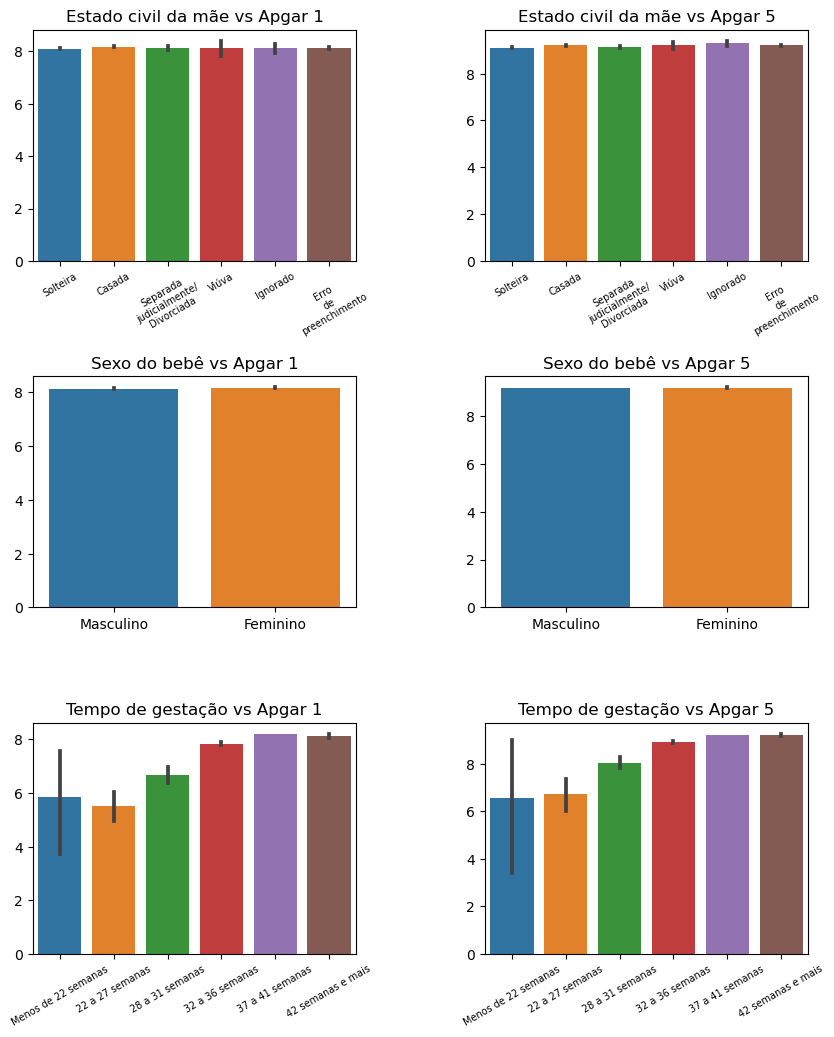

In [17]:
plt.rc('figure', figsize=(10, 12))
fig, axes = plt.subplots(3, 2)

for i, apgar in enumerate(['APGAR1', 'APGAR5']):
    ecvm_plot = sns.barplot(ax=axes[0, i], x='ESTCIVMAE', y=apgar, estimator='mean', data=df, order=ord_ecm)
    sexo_plot = sns.barplot(ax=axes[1, i], x='SEXO', y=apgar, estimator='mean', data=df)
    gest_plot = sns.barplot(ax=axes[2, i], x='GESTACAO', y=apgar, estimator='mean', data=df, order=ord_gest)

    ecvm_plot.set(title=f'Estado civil da mãe vs Apgar {apgar[-1]}', xlabel=None, ylabel=None)
    sexo_plot.set(title=f'Sexo do bebê vs Apgar {apgar[-1]}', xlabel=None, ylabel=None)
    gest_plot.set(title=f'Tempo de gestação vs Apgar {apgar[-1]}', xlabel=None, ylabel=None)

    ecvm_plot.tick_params(axis='x', direction='out', labelrotation=30, labelsize=7)
    gest_plot.tick_params(axis='x', direction='out', labelrotation=30, labelsize=7)

plt.subplots_adjust(hspace=0.5, wspace=0.4)

#### 3) Monte um gráfico de barras mostrando o APGAR5 médio por CONSULTAS

In [18]:
consultas_cat = {
    1:'Nenhuma',
    2:'1 a 3',
    3:'4 a 6',
    4:'7 e mais',
    9:'Ignorado'
}

In [19]:
df['CONSULTAS'] = df['CONSULTAS'].replace(consultas_cat)

In [20]:
df

,APGAR1,APGAR5,SEXO,GESTACAO,ESTCIVMAE,CONSULTAS
0,9.0,10.0,Masculino,37 a 41 semanas,Erro\nde\npreenchimento,7 e mais
1,8.0,9.0,Feminino,37 a 41 semanas,Casada,7 e mais
2,8.0,10.0,Feminino,37 a 41 semanas,Ignorado,7 e mais
3,9.0,10.0,Feminino,37 a 41 semanas,Erro\nde\npreenchimento,4 a 6
4,8.0,10.0,Feminino,37 a 41 semanas,Casada,7 e mais
...,...,...,...,...,...,...
27023,8.0,9.0,Masculino,32 a 36 semanas,Casada,7 e mais
27024,8.0,9.0,Masculino,37 a 41 semanas,Solteira,7 e mais
27025,9.0,10.0,Masculino,37 a 41 semanas,Casada,7 e mais
27026,8.0,9.0,Masculino,32 a 36 semanas,Casada,7 e mais


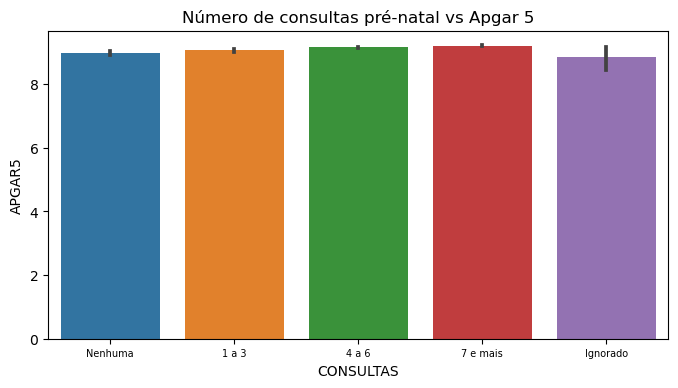

In [21]:
plt.close('all')
plt.rc('figure', figsize=(8,4))

f = sns.barplot(x='CONSULTAS', y='APGAR5', estimator='mean', data=df, order=ord_consultas)
f.set(title='Número de consultas pré-natal vs Apgar 5')
f.tick_params(axis='x', direction='out', labelsize=7)

####  4) Monte um painel com 4 gráficos mostrando as frequencias de SEXO, GESTACAO, ESTCIVMAE e CONSULTAS

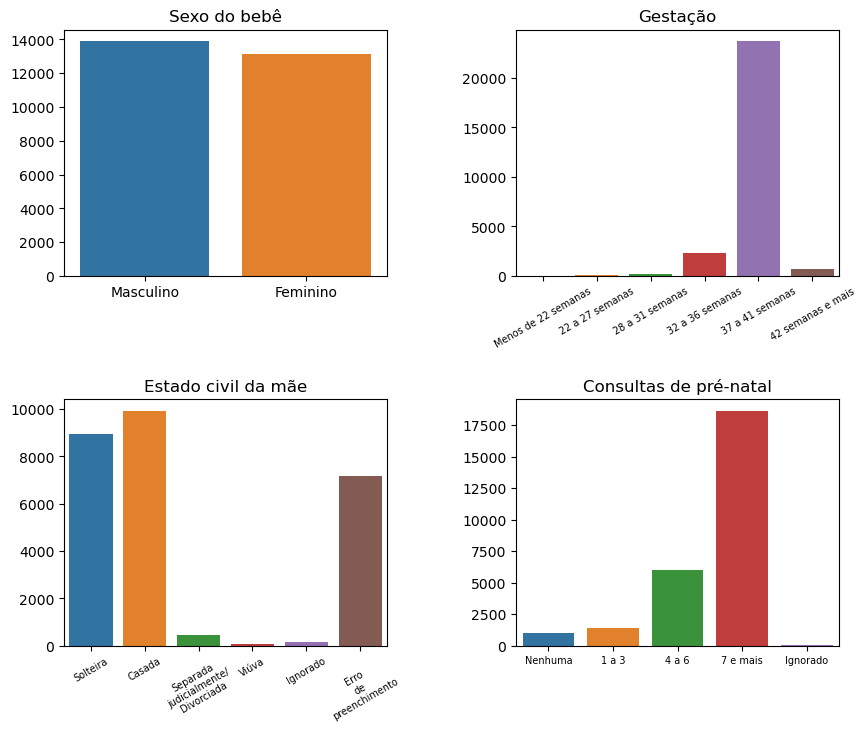

In [22]:
plt.close('all')
plt.rc('figure', figsize=(10, 8))
fig, axes = plt.subplots(2, 2)

sexo_plot = sns.countplot(ax = axes[0,0], x='SEXO',data=df)
gest_plot = sns.countplot(ax = axes[0, 1], x='GESTACAO', data=df, order=ord_gest)
ecvm_plot = sns.countplot(ax = axes[1, 0], x='ESTCIVMAE', data=df, order=ord_ecm)
cons_plot = sns.countplot(ax = axes[1, 1], x='CONSULTAS', data=df, order=ord_consultas)

sexo_plot.set(title='Sexo do bebê', xlabel=None, ylabel=None)
gest_plot.set(title='Gestação', xlabel=None, ylabel=None)
ecvm_plot.set(title='Estado civil da mãe', xlabel=None, ylabel=None)
cons_plot.set(title='Consultas de pré-natal', xlabel=None, ylabel=None)


gest_plot.tick_params(axis='x', direction='out', labelrotation=30, labelsize=7)
ecvm_plot.tick_params(axis='x', direction='out', labelrotation=30, labelsize=7)
cons_plot.tick_params(axis='x', direction='out', labelsize=7)

plt.subplots_adjust(hspace=0.5, wspace=0.4)